# **Decision Trees**

arbitrary data with two features

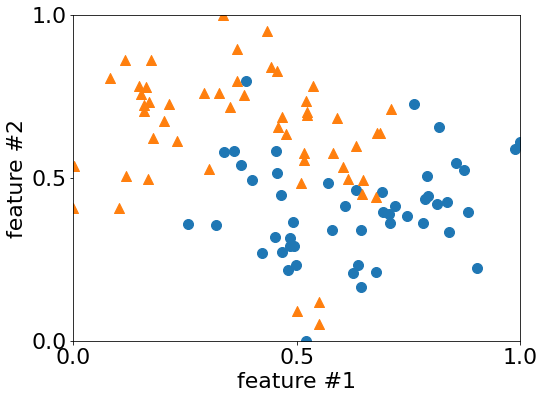

In [1]:
import sklearn.datasets
import numpy
import matplotlib.pyplot

def one_hot_enc(a):
        """
        Find one hot encodings of arrays.
        """

        return (a - a.min()) / (a.max() - a.min())
        
inputs, outputs = sklearn.datasets.make_moons(n_samples    = 100,
                                              noise        = 0.3, 
                                              random_state = 1)
inputs[:, 0]    = one_hot_enc(inputs[:, 0])
inputs[:, 1]    = one_hot_enc(inputs[:, 1])
outputs         = outputs.reshape(len(outputs), 1)
data            = numpy.hstack((inputs, outputs))
data            = numpy.append(data, [[0.55, 0.12, 0]], axis = 0)
data            = numpy.append(data, [[0.5,  0.09, 0]], axis = 0)
data            = numpy.append(data, [[0.55, 0.05, 0]], axis = 0)

def init_plot():
        """
        Sets plot parameters.
        """

        matplotlib.rcParams.update({"font.size" : 22})
        matplotlib.pyplot.rcParams["figure.figsize"] = (8, 6)
        matplotlib.pyplot.xlim([0, 1])
        matplotlib.pyplot.ylim([0, 1])
        matplotlib.pyplot.xlabel("feature #1")
        matplotlib.pyplot.ylabel("feature #2")
        matplotlib.pyplot.xticks([0, 0.5, 1])
        matplotlib.pyplot.yticks([0, 0.5, 1])

init_plot()
data_a  = data[numpy.where(data[:, -1] == 1)]
scatter = matplotlib.pyplot.scatter(data_a[:, 0], 
                                    data_a[:, 1], 
                                    s      = 100, 
                                    marker = "o")
data_b  = data[numpy.where(data[:, -1] == 0)]
scatter = matplotlib.pyplot.scatter(data_b[:, 0], 
                                    data_b[:, 1], 
                                    s      = 100, 
                                    marker = "^")

plotting function for decision tree models and the data

In [2]:
def make_plot(model, data):
        """
        Creates plots of decision tree models and the data
        """

        init_plot()
        data_a  = data[numpy.where(data[:, -1] == 1)]
        scatter = matplotlib.pyplot.scatter(data_a[:, 0], 
                                            data_a[:, 1], 
                                            s      = 100, 
                                            marker = "o",
                                            zorder = 2)
        data_b  = data[numpy.where(data[:, -1] == 0)]
        scatter = matplotlib.pyplot.scatter(data_b[:, 0], 
                                            data_b[:, 1], 
                                            s      = 100, 
                                            marker = "^",
                                            zorder = 2)
        f1      = numpy.arange(0.0, 1.01, 0.01)
        f2      = numpy.arange(0.0, 1.01, 0.01)
        F1, F2  = numpy.meshgrid(f1, f2) 
        model_  = numpy.fromiter(map(model, F1.ravel(), F2.ravel()), 
                                 "float64")
        model_  = model_.reshape(F1.shape)
        contour = matplotlib.pyplot.contourf(F1, 
                                             F2, 
                                             model_, 
                                             alpha  = 0.3, 
                                             zorder = 1)

plots of various models and the data

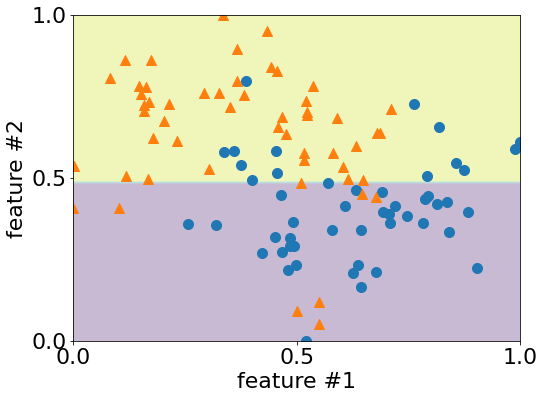

In [3]:
def model(x, y):
        return y > 0.483

make_plot(model, data) 

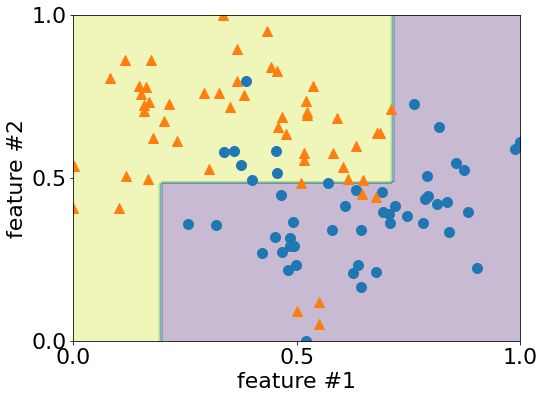

In [7]:
def model(x, y):
        if y > 0.483:
                if x < 0.711:
                        result = 1
                else:
                        result = 0 
        else:
                if x < 0.2:
                        result = 1
                else:
                        result = 0

        return result

make_plot(model, data)

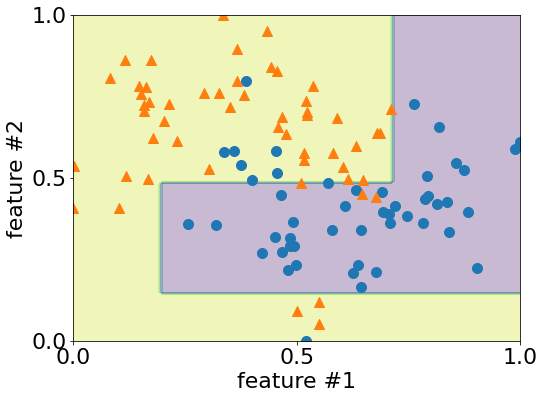

In [8]:
def model(x, y):
        if y > 0.483:
                if x < 0.711:
                        result = 1
                else:
                        result = 0 
        else:
                if x < 0.2:
                        result = 1
                else:
                        if y < 0.15:
                                result = 1
                        else:
                                result = 0

        return result

make_plot(model, data)

Making model more complex will model the *training* data more accurately but likely not *unseen* data!  That is referred to as *overfitting*.

# **Random Forests**

Create many different decision trees trained on *derivations* of the original dataset.  Constrain allowed features at each stage.

# **Gradient Boosting**

Create a *sequence* of decision trees that each try to compensate for previous errors.